# shap-studies
## João Avanzini
**Dataset:** adult https://shap.readthedocs.io/en/latest/generated/shap.datasets.adult.html#shap.datasets.adult

### Imports

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import xgboost
import shap

### Dataset 

In [3]:
shap.datasets.adult(display=True)

(        Age          Workclass  Education-Num       Marital Status  \
 0      39.0          State-gov           13.0        Never-married   
 1      50.0   Self-emp-not-inc           13.0   Married-civ-spouse   
 2      38.0            Private            9.0             Divorced   
 3      53.0            Private            7.0   Married-civ-spouse   
 4      28.0            Private           13.0   Married-civ-spouse   
 ...     ...                ...            ...                  ...   
 32556  27.0            Private           12.0   Married-civ-spouse   
 32557  40.0            Private            9.0   Married-civ-spouse   
 32558  58.0            Private            9.0              Widowed   
 32559  22.0            Private            9.0        Never-married   
 32560  52.0       Self-emp-inc            9.0   Married-civ-spouse   
 
                Occupation    Relationship    Race      Sex  Capital Gain  \
 0            Adm-clerical   Not-in-family   White     Male        21

In [4]:
X, y = shap.datasets.adult()

In [5]:
X

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
0,39.0,7,13.0,4,1,0,4,1,2174.0,0.0,40.0,39
1,50.0,6,13.0,2,4,4,4,1,0.0,0.0,13.0,39
2,38.0,4,9.0,0,6,0,4,1,0.0,0.0,40.0,39
3,53.0,4,7.0,2,6,4,2,1,0.0,0.0,40.0,39
4,28.0,4,13.0,2,10,5,2,0,0.0,0.0,40.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,4,12.0,2,13,5,4,0,0.0,0.0,38.0,39
32557,40.0,4,9.0,2,7,4,4,1,0.0,0.0,40.0,39
32558,58.0,4,9.0,6,1,1,4,0,0.0,0.0,40.0,39
32559,22.0,4,9.0,4,1,3,4,1,0.0,0.0,20.0,39


In [6]:
y

array([False, False, False, ..., False, False,  True])

Text(0.5, 0, 'Capital Gain')

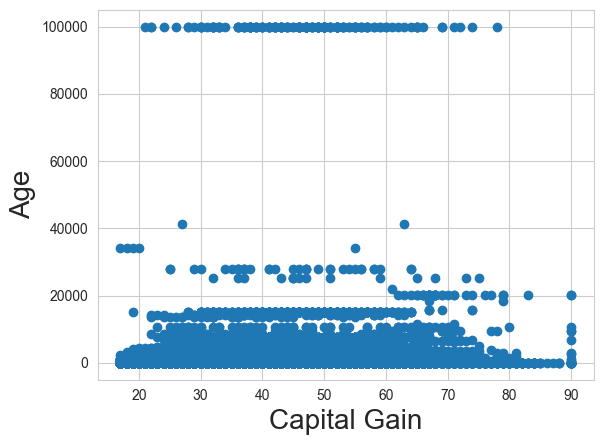

In [7]:
plt.scatter(X['Age'], X['Capital Gain'])
plt.ylabel('Age', size=20)
plt.xlabel('Capital Gain', size=20)

Text(0.5, 0, 'Sex')

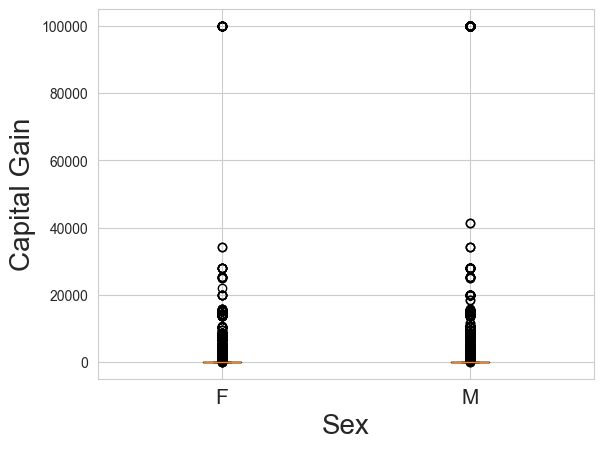

In [8]:
plt.boxplot(X[X.Sex == 0]['Capital Gain'], positions=[1])
plt.boxplot(X[X.Sex == 1]['Capital Gain'], positions=[2])

plt.xticks(ticks=[1, 2], labels=['F', 'M'], size=15)
plt.ylabel('Capital Gain', size=20)
plt.xlabel('Sex', size=20)

### Modelling

In [9]:
model = xgboost.XGBClassifier().fit(X, y)

In [10]:
y_pred = model.predict(X)

Text(0, 0.5, 'Actual')

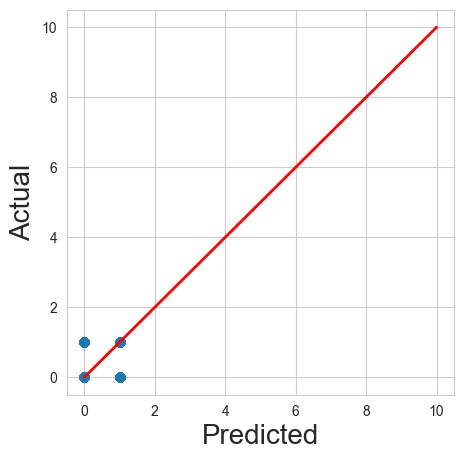

In [11]:
plt.figure(figsize=(5, 5))

plt.scatter(y, y_pred)
plt.plot([0, 10],
         [0, 10],
         color='r',
         linestyle='-',
         linewidth=2)

plt.xlabel('Predicted', size=20)
plt.ylabel('Actual', size=20)

### Standard SHAP values

In [12]:
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

[17:08:19] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
 99%|===================| 32151/32561 [00:58<00:00]        

### Waterfall plot

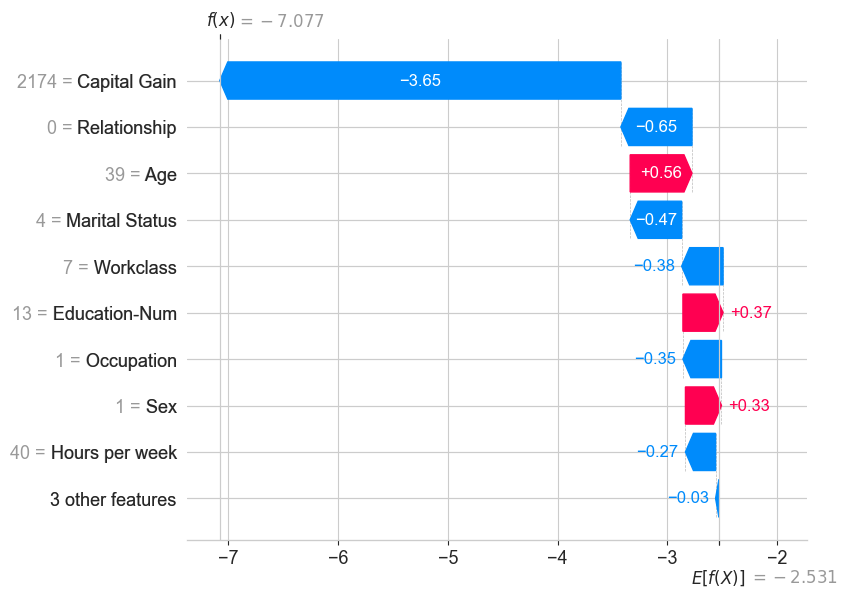

In [13]:
shap.plots.waterfall(shap_values[0])

### Force plot

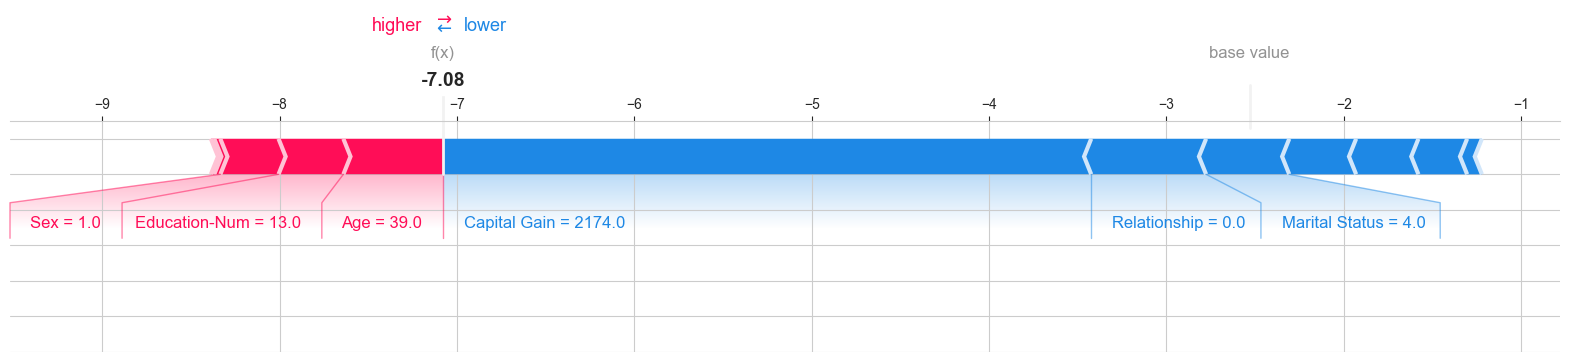

In [27]:
shap.plots.force(shap_values[0], matplotlib=True)

### Stacked force plot

In [15]:
shap.plots.force(shap_values[0:100])

### Absolute Mean SHAP

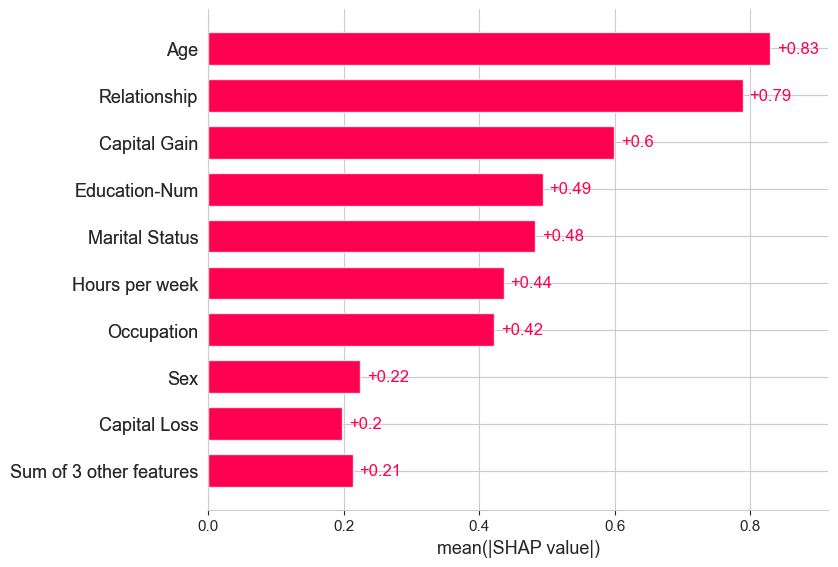

In [16]:
shap.plots.bar(shap_values)

### Beeswarm plot

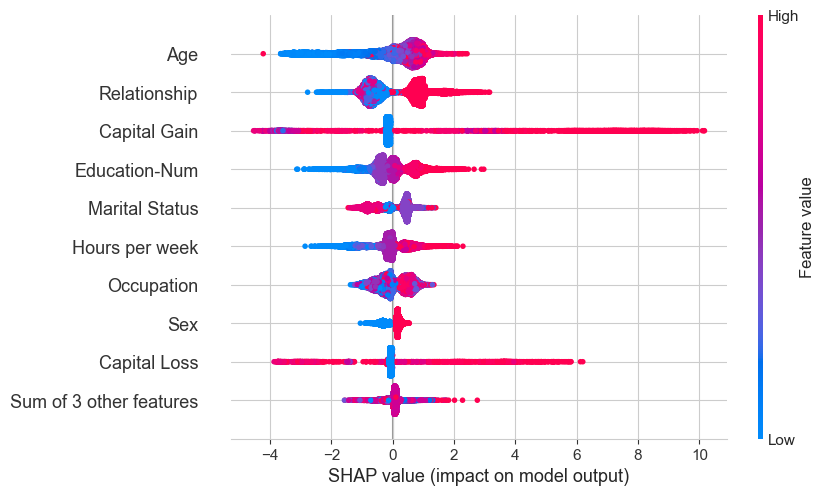

In [17]:
shap.plots.beeswarm(shap_values)

### Dependence plots

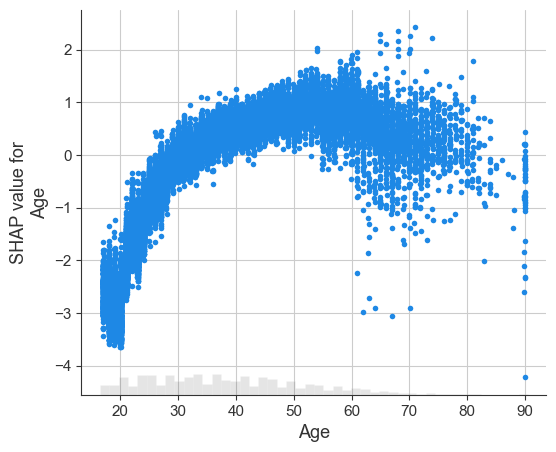

In [18]:
shap.plots.scatter(shap_values[:,"Age"])

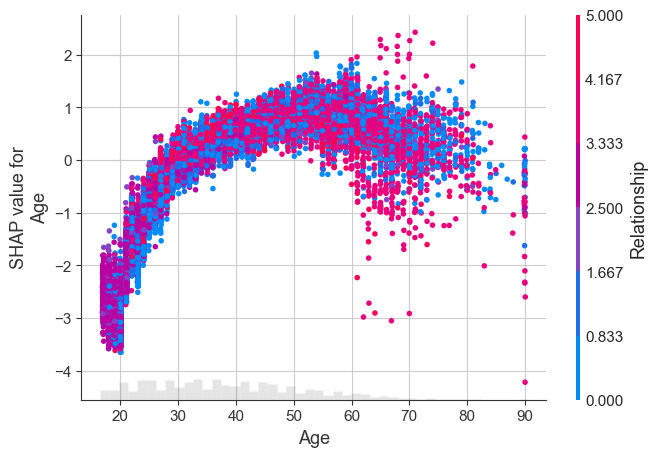

In [19]:
shap.plots.scatter(shap_values[:,"Age"],
                   color=shap_values[:,"Relationship"])

In [ ]:
#shap.plots.heatmap(shap_values)